# Właściwości termofizyczne czynnika

In [1]:
import math

liq = {
"ro" : 1117,
"la" : 0.1649,
"cp" : 1668,
"mi" : 0.0001792}
liq["ni"] = liq["mi"]/liq["ro"],
liq["Pr"] = liq["mi"]*liq["cp"]/liq["la"]

vap = {
"ro" : 11.272,
"la" : 0.00936,
"cp" : 1001,
"mi" : 0.00001066}
vap["ni"] = vap["mi"]/vap["ro"],
vap["Pr"] = vap["mi"]*vap["cp"]/vap["la"]

sigma = 0.0146
r = 340860


In [2]:
air = {
"ro" : 1.342,
"la" : 0.0236,
"cp" : 1009,
"mi" : 0.0000167}
air["ni"] = air["mi"]/air["ro"],
air["Pr"] = 0.712

# Wrzenie w poziomych rurach bez żeber

In [3]:
def wrzenie_bez_zeber(mass_flow,d_h):
    Re_vap = mass_flow*d_h/liq["mi"]
    Nu_vap = 0.023*Re_vap**0.8*liq["Pr"]**(1/3)
    alfa_k = Nu_vap*liq["la"]/d_h
#     print(Re_vap, Nu_vap, mass_flow)
    alfa_b = 0.00122*liq["la"]**0.79*liq["cp"]**0.45*liq["ro"]**0.49*9.81/(sigma**0.5*liq["mi"]**0.29*r**0.24*vap["ro"]**0.24)*dT**0.24*dp**0.75
    
    F = (liq["ro"]/vap["ro"])**0.5*(liq["mi"]/vap["mi"])**0.1
    S = 0.003 #Re_vap*(mass_flow**2*d_h*math.pi/4/liq["ro"]**2/9.81)**1.25

    alfa = F*alfa_k+S*alfa_b
#     print(F,alfa_k,S,alfa_b)
    return(alfa)


# Wrzenie w poziomych rurach z żebrami

In [4]:
def wrzenie_z_zebrami(e,d_h,p,a,mass_flow):
    e = 39.37*e
    d = 39.37*d_h
    p = 39.37*p
    
    Re = mass_flow*d_h/liq["mi"]
    Nu=0.117*Re**0.78*liq["Pr"]**0.542*(e/d)**0.3*(p/d)**-0.22*(a/90)**0.215
    alfa=liq["la"]*Nu/d_h

    F = (liq["ro"]/vap["ro"])**0.5*(liq["mi"]/vap["mi"])**0.1
   
    alfa = F*alfa
    return(alfa)

# Opływ gładkiego pęczka rur

In [5]:
def oplyw_bez_zeber_szereg(S_q,S_l,d_z,w_cz,n_r):
    
    l = math.pi*d_z/2
    
    a = S_q/d_z
    b = S_l/d_z
    
    if b<1:
        psi = 1-math.pi/4/a/b
    else:
        psi = 1-math.pi/4/a
    
    f_a = 1+(0.7*(b/a-0.3))/(psi**1.5*(b/a+0.7)**2)
    
    Re = w_cz*l*air["ro"]/psi/air["mi"]
    Nu_1L = 0.644*Re**0.5*air["Pr"]**(1/3)
    Nu_1T = 0.037*Re**0.8*air["Pr"]/(1+2.443*Re**-0.1*(air["Pr"]**(2/3)-1))
    Nu_1gl = 0.3+math.sqrt(Nu_1L**2+Nu_1T**2)
    Nu = (1+(n_r-1)*f_a)/n_r*Nu_1gl
    alfa = air["la"]*Nu/l
    return(alfa)

In [6]:
def oplyw_bez_zeber_przest(S_q,S_l,d_z,w_cz,n_r):
    
    l = math.pi*d_z/2
    
    a = S_q/d_z
    b = S_l/d_z
    
    if b<1:
        psi = 1-math.pi/4/a/b
    else:
        psi = 1-math.pi/4/a
    
    f_a = 1+2/3/b
    
    Re = w_cz*l*air["ro"]/psi/air["mi"]
    Nu_1L = 0.644*Re**0.5*air["Pr"]**(1/3)
    Nu_1T = 0.037*Re**0.8*air["Pr"]/(1+2.443*Re**-0.1*(air["Pr"]**(2/3)-1))
    Nu_1gl = 0.3+math.sqrt(Nu_1L**2+Nu_1T**2)
    Nu = (1+(n_r-1)*f_a)/n_r*Nu_1gl
    alfa = air["la"]*Nu/l
    return(alfa)

# Opływ lamelowanego peczka rur

In [7]:
def oplyw_lamel_szereg(S_q,S_l,d_z,w_cz,n_r,n_rr,t,dt,L):
    
#     A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
#     A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
#     A_gl = math.pi*d_z*L*n_r*n_rr

    w_0 = w_cz*S_q*t/((S_q-d_z)*(t-dt))

    Re = w_0*d_z*air["ro"]/air["mi"]

    Nu = 0.22*Re**0.6*((A_r+A_z)/A_gl)**-0.15*air["Pr"]**(1/3)
    alfa = air["la"]*Nu/d_z
    return(alfa)

In [8]:
def oplyw_lamel_przest(S_q,S_l,d_z,w_cz,n_r,n_rr,t,dt,L):
    
#     A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
#     A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
#     A_gl = math.pi*d_z*L*n_r*n_rr
    w = [w_cz*S_q*t/((S_q-d_z)*(t-dt)),w_cz*0.5*S_q*t/((math.sqrt(S_q**2+4*S_l**2)-d_z)*(t-dt))]
    w_0 = max(w)

    Re = w_0*d_z*air["ro"]/air["mi"]

    Nu = 0.38*Re**0.6*((A_r+A_z)/A_gl)**-0.15*air["Pr"]**(1/3)
    
    alfa = air["la"]*Nu/d_z
    return(alfa)

# Sprawność żeber

In [9]:
def sprawnosc_zeber_szereg(S_q,S_l,alfa,lam,dt,d_z):
    A = max(S_q,S_l)
    B = min(S_q,S_l)
    fi = 1.28*B/d_z*math.sqrt(A/B-0.2)
    h_z = d_z/2*(fi-1)*(1+0.35*math.log(fi))
    m = math.sqrt(2*alfa/dt/lam)
    E_z = math.tanh(m*h_z)/m/h_z
    
    return(E_z)

In [10]:
def sprawnosc_zeber_przest(S_q,S_l,alfa,lam,dt,d_z):
    A = math.sqrt(0.25*S_q**2+S_l**2)
    if S_l<0.5*S_q:
        B = 2*S_l
    else:
        B = S_q
    fi = 1.27*B/d_z*math.sqrt(A/B-0.3)
    h_z = d_z/2*(fi-1)*(1+0.35*math.log(fi))
    m = math.sqrt(2*alfa/dt/lam)
    E_z = math.tanh(m*h_z)/m/h_z
    
    return(E_z)

# Przewodzenie przez ściankę

In [11]:
def przewodzenie(d_z,d_w,lam):
    R = math.log(d_z/d_w)/2/lam/math.pi
    return(R)

# Przenikanie przez ścianke

In [32]:
def bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT):
    alfa_in = wrzenie_bez_zeber(mass_flow,d_w)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_bez_zeber_szereg(S_q,S_l,d_z,w_cz,n_r)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*A_gl)
    przenik = 1/R
    return(przenik)


def zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT):
    alfa_in = wrzenie_z_zebrami(e,d_z,p,a,mass_flow)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_bez_zeber_szereg(S_q,S_l,d_z,w_cz,n_r)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*A_gl)
    przenik = 1/R
    return(przenik)


def zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT):
    alfa_in = wrzenie_bez_zeber(mass_flow,d_w)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_lamel_szereg(S_q,S_l,d_z,w_cz,n_r,n_rr,t,dt,L)
    f = sprawnosc_zeber_szereg(S_q,S_l,alfa_out,lam,dt,d_z)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*(A_z*f+A_r))
    przenik = 1/R
    return(przenik)


def zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT):
    alfa_in = wrzenie_z_zebrami(e,d_z,p,a,mass_flow)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_lamel_szereg(S_q,S_l,d_z,w_cz,n_r,n_rr,t,dt,L)
    f = sprawnosc_zeber_szereg(S_q,S_l,alfa_out,lam,dt,d_z)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*(A_z*f+A_r))
    przenik = 1/R
    return(przenik)

def zebra_out_przest(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT):
    alfa_in = wrzenie_bez_zeber(mass_flow,d_w)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_lamel_przest(S_q,S_l,d_z,w_cz,n_r,n_rr,t,dt,L)
    f = sprawnosc_zeber_przest(S_q,S_l,alfa_out,lam,dt,d_z)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*(A_z*f+A_r))
    przenik = 1/R
    return(przenik)


def zebra_in_out_przest(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT):
    alfa_in = wrzenie_z_zebrami(e,d_z,p,a,mass_flow)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_lamel_przest(S_q,S_l,d_z,w_cz,n_r,n_rr,t,dt,L)
    f = sprawnosc_zeber_przest(S_q,S_l,alfa_out,lam,dt,d_z)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*(A_z*f+A_r))
    przenik = 1/R
    return(przenik)

# Dane wymiennika

In [13]:
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr

In [14]:
# zmienna różnica temperatur
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10 # K

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p1 = []
p2 = []
p3 = []
p4 = []
for T in range(0,16,1):
    dT = T/10
    x1 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x2 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x4 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    step.append(T)
    p1.append(x1)
    p2.append(x2)
    p3.append(x3)
    p4.append(x4)

import matplotlib.pyplot as plt
labels = ["Pęczek rur gładkich","Pęczek rur żebrowanych wewnętrznie","Pęczek rur lamelowanych","Pęczek rur lamelowanych żebrowanych wewnętrznie"]
plt.figure(figsize=(10,7))
plt.plot(step,p1)
plt.plot(step,p2)
plt.plot(step,p3)
plt.plot(step,p4)
plt.ylabel("Moc wymiennika [W]")
plt.xlabel("Różnica temperatur [K]")
plt.legend(labels=labels)
print(p3[15]/p1[15])
print(p4[15]/p3[15])

8.48014286663345
1.0211705611708743


6.444373354964305
1.044564464270292
1.0066643444527767


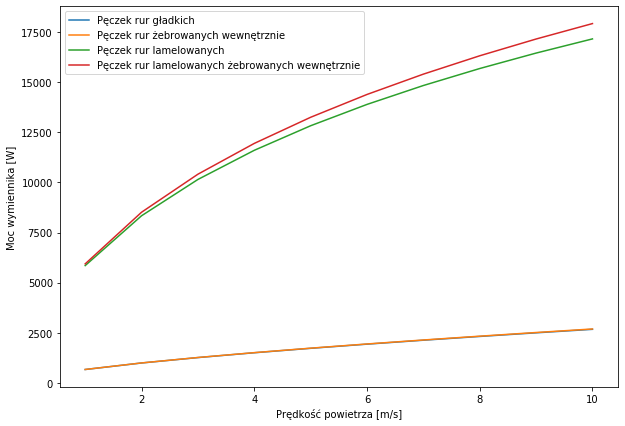

In [34]:
# zmienna predkosc powietrza
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr

step = []
p1 = []
p2 = []
p3 = []
p4 = []
for w_cz in range(1,11,1):
    x1 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x2 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x4 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    step.append(w_cz)
    p1.append(x1)
    p2.append(x2)
    p3.append(x3)
    p4.append(x4)

import matplotlib.pyplot as plt
labels = ["Pęczek rur gładkich","Pęczek rur żebrowanych wewnętrznie","Pęczek rur lamelowanych","Pęczek rur lamelowanych żebrowanych wewnętrznie"]
plt.figure(figsize=(10,7))
plt.plot(step,p1)
plt.plot(step,p2)
plt.plot(step,p3)
plt.plot(step,p4)
plt.ylabel("Moc wymiennika [W]")
plt.xlabel("Prędkość powietrza [m/s]")
plt.legend(labels=labels)
print(p3[9]/p1[9])
print(p4[9]/p3[9])
print(p2[9]/p1[9])

1.025495384761702


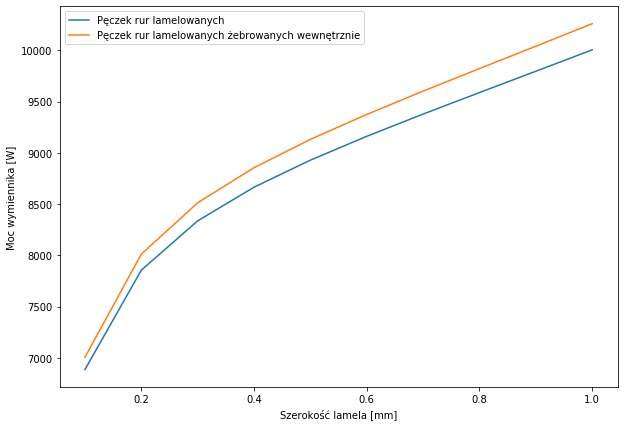

In [16]:
# zmienna grubości lamela
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p3 = []
p4 = []

for dt in range(1,11,1):
    dt = dt/10000
    if dt!=t:
        x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
        x4 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
        step.append(dt)
        p3.append(x3)
        p4.append(x4)
step = [xx*1000 for xx in step]

import matplotlib.pyplot as plt
labels = ["Pęczek rur lamelowanych","Pęczek rur lamelowanych żebrowanych wewnętrznie"]
plt.figure(figsize=(10,7))
# plt.plot(step,p1)
# plt.plot(step,p2)
plt.plot(step,p3)
plt.plot(step,p4)
plt.ylabel("Moc wymiennika [W]")
plt.xlabel("Szerokość lamela [mm]")
plt.legend(labels=labels)
print(p4[9]/p3[9])

1.0234977576224626
7557.8467611118695
1.022177435012949
[6984.202162710976, 7114.168558487729, 7220.97112062473, 7310.32197692974, 7386.190550909443, 7451.423402235455, 7508.1162289238855, 7557.8467611118695, 7601.8258286114315, 7640.998361603993, 7676.112707278, 7707.7693019732, 7736.455543803648, 7762.571230543755, 7786.447415932318, 7808.360591153615, 7828.5434913506215, 7847.193429343608, 7864.478793006488, 7880.544162027483, 7895.514374854115, 7909.497788973814, 7922.588915338928, 7934.870562837313, 7946.41559597965, 7957.288384857953, 7967.546008478454, 7977.239259082067, 7986.4134848377125, 7995.109300474052, 8003.3631893892925, 8011.208016100746, 8018.673464238731, 8025.786412411394, 8032.5712579878755, 8039.050197031729, 8045.243467161849, 8051.169558946631, 8056.845400488563, 8062.286519084893, 8067.507183219151, 8072.520527620716, 8077.338663702583, 8081.972777334072, 8086.433215611588, 8090.729564045398, 8094.870715375383, 8098.864931056216, 8102.719896307353, 8106.44276950

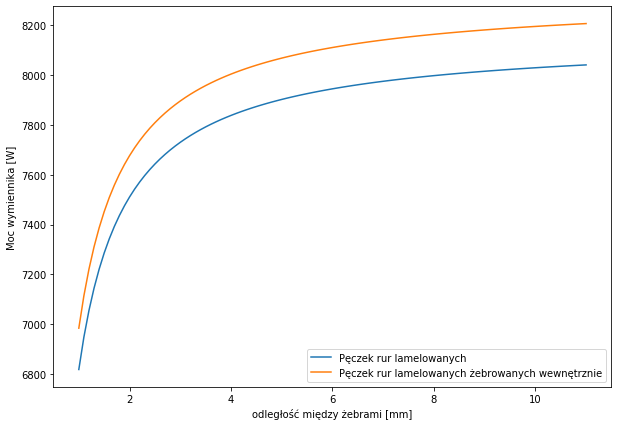

In [17]:
# zmienna aodleglosc miedzy lamelami
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p3 = []
p4 = []

for t in range(10,111,1):
    t = t/10000
#     x1 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x2 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x3 = 667222/zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x4 = 667222/zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    step.append(t)
#     p1.append(x1)
#     p2.append(x2)
    p3.append(x3)
    p4.append(x4)
step = [xx*1000 for xx in step]

import matplotlib.pyplot as plt
labels = ["Pęczek rur lamelowanych","Pęczek rur lamelowanych żebrowanych wewnętrznie"]
plt.figure(figsize=(10,7))
# plt.plot(step,p1)
# plt.plot(step,p2)
plt.plot(step,p4)
plt.plot(step,p3)
plt.ylabel("Moc wymiennika [W]")
plt.xlabel("odległość między żebrami [mm]")
plt.legend(labels=labels)
print(p3[2]/p4[2])
print(p3[7])
print(p3[9]/p4[9])
print(p3)

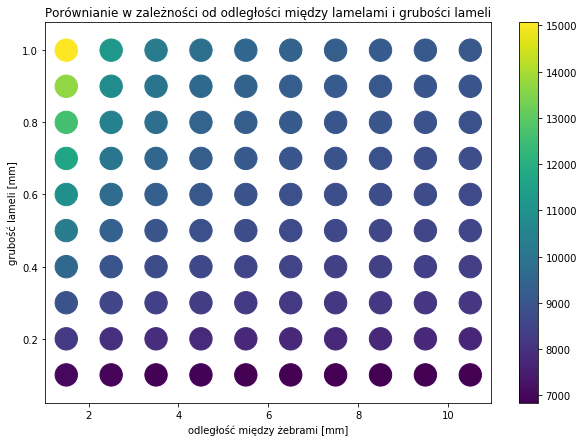

In [18]:
# zmienna aodleglosc miedzy lamelami i grubosc lamela
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10
A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = {}
p3 = []
p4 = []

for dt in range(1,11,1):
    dt = dt/10000 
    for t in range(3,23,2):    
        t = t/2000
        if t!=dt:
            x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
            step[dt,t]=x3
vals = [r for r in step.keys()]
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.title("Porównianie w zależności od odległości między lamelami i grubości lameli")
plt.scatter([1000*v[1] for v in vals],
            [1000*v[0] for v in vals], 
            c=[step[v[0],v[1]] for v in vals],s=500)
# plt.ylim(0,0.0011)
# plt.xlim(0,0.011)
plt.ylabel("grubość lameli [mm]")
plt.xlabel("odległość między żebrami [mm]")
plt.colorbar()

1.0143883829388565


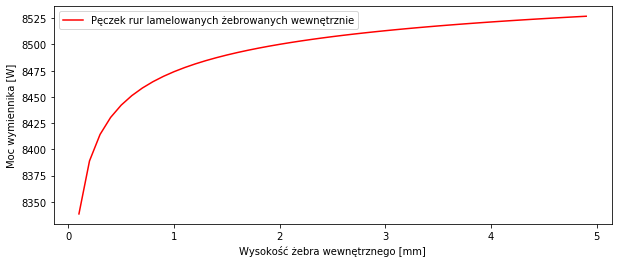

In [40]:
##### wysokość żeber wewnętrznych
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p2 = []
p4 = []
for e in range(1,50,1):
    e = e/10000
#     x1 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x4 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x4 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    step.append(e)
#     p1.append(x1)
#     p2.append(x2)
#     p3.append(x3)
    p4.append(x4)
step = [xx*1000 for xx in step]

import matplotlib.pyplot as plt
#labels = ["Pęczek rur żebrowanych wewnętrznie"]
labels = ["Pęczek rur lamelowanych żebrowanych wewnętrznie"]
plt.figure(figsize=(10,4))
# plt.plot(step,p1)
# plt.plot(step,p2)
# plt.plot(step,p3)
plt.plot(step,p4, color="red")
plt.ylabel("Moc wymiennika [W]")
plt.xlabel("Wysokość żebra wewnętrznego [mm]")
plt.legend(labels=labels)
print(p4[6]/p4[0])

0.995577226572738


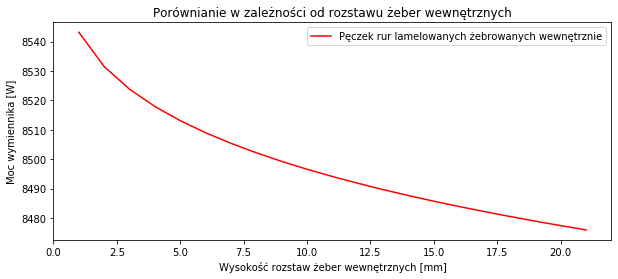

In [20]:
#wysokość odległość między żebrami wewnętrznymi
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p2 = []
p4 = []
for p in range(1,22,1):
    p = p/1000
#    x1 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x4 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x2 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    step.append(p)
#    p1.append(x1)
    p2.append(x2)
#     p3.append(x3)
#     p4.append(x4)
step = [xx*1000 for xx in step]

import matplotlib.pyplot as plt
labels = ["Pęczek rur lamelowanych żebrowanych wewnętrznie"]
plt.figure(figsize=(10,4))
plt.title("Porównianie w zależności od rozstawu żeber wewnętrznych")
#plt.plot(step,p1)
plt.plot(step,p2,color="red")
# plt.plot(step,p3)
# plt.plot(step,p4,color="red")
plt.ylabel("Moc wymiennika [W]")
plt.xlabel("Wysokość rozstaw żeber wewnętrznych [mm]")
plt.legend(labels=labels)
print(p2[6]/p2[0])

1.00392893989828


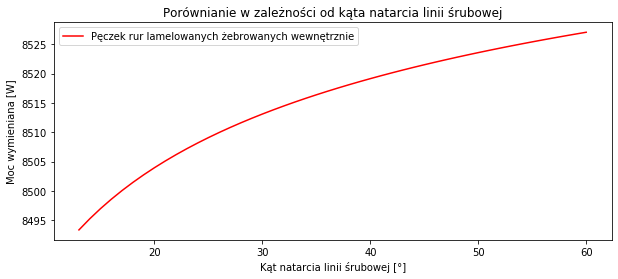

In [21]:
#kąt natarcie lini śrubowej
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p2 = []

for a in range(13,61,1):
#     x1 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x2 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x2 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    step.append(a)
#     p1.append(x1)
    p2.append(x2)
#     p3.append(x3)
#     p4.append(x4)

import matplotlib.pyplot as plt
labels = ["Pęczek rur lamelowanych żebrowanych wewnętrznie"]
plt.figure(figsize=(10,4))
plt.title("Porównianie w zależności od kąta natarcia linii śrubowej")
# plt.plot(step,p1)
plt.plot(step,p2,color="red")
# plt.plot(step,p3)
# plt.plot(step,p4)
plt.ylabel("Moc wymieniana [W]")
plt.xlabel("Kąt natarcia linii śrubowej [°]")
plt.legend(labels=labels)
print(p2[46]/p2[0])

1.007898900327704
1.0013664632452435


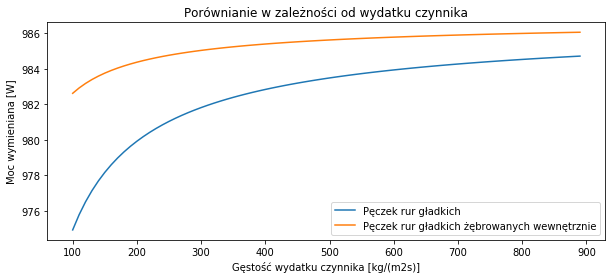

In [22]:
#wydatek czynnika
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p1 = []
p2 = []
p3 = []
p4 = []

for mass_flow in range(100,900,10):
    x3 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x4 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x4 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    step.append(mass_flow)
#     p1.append(x1)
#     p2.append(x2)
    p3.append(x3)
    p4.append(x4)

import matplotlib.pyplot as plt
labels = ["Pęczek rur gładkich","Pęczek rur gładkich żębrowanych wewnętrznie"]
plt.figure(figsize=(10,4))
plt.title("Porównianie w zależności od wydatku czynnika")
# plt.plot(step,p1)
# plt.plot(step,p2)
plt.plot(step,p3)
plt.plot(step,p4)
plt.ylabel("Moc wymieniana [W]")
plt.xlabel("Gęstość wydatku czynnika [kg/(m2s)]")
plt.legend(labels=labels)
print(p4[0]/p3[0])
print(p4[len(p4)-1]/p3[len(p3)-1])

In [23]:
# zmienna predkosc powietrza
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10
A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr

x1 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
x2 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
x4 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T

print(x1,x2,x3,x4)

983.0774386415368 985.4845841248821 8336.770232851488 8513.110244208157


Text(0.5, 0, 'Grubość lamela [mm]')

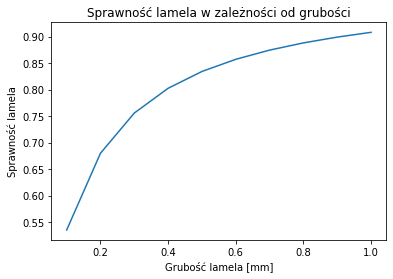

In [24]:
alfa_out = 70
step = []
p1 = []
for dt in range(1,11,1):
    dt=dt/10000
    f=sprawnosc_zeber_szereg(S_q,S_l,alfa_out,lam,dt,d_z)
    step.append(dt*1000)
    p1.append(f)

plt.plot(step,p1)
plt.title("Sprawność lamela w zależności od grubości")
plt.ylabel("Sprawność lamela")
plt.xlabel("Grubość lamela [mm]")

1.5844945401609987
1.388446407202514


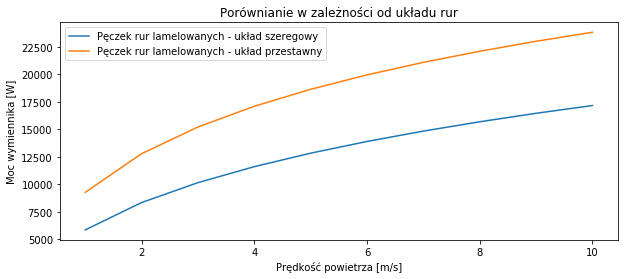

In [25]:
#wydatek czynnika
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10

A_r = math.pi*d_z*(t-dt)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p1 = []
p2 = []
p3 = []
p4 = []

for w_cz in range(1,11,1):
    x1 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    x2 = zebra_out_przest(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x3 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x4 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
#     x4 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT)*T
    step.append(w_cz)
    p1.append(x1)
    p2.append(x2)
#     p3.append(x3)
#     p4.append(x4)

import matplotlib.pyplot as plt
labels = ["Pęczek rur lamelowanych - układ szeregowy","Pęczek rur lamelowanych - układ przestawny"]
plt.figure(figsize=(10,4))
plt.title("Porównianie w zależności od układu rur")
plt.plot(step,p1)
plt.plot(step,p2)
# plt.plot(step,p3)
# plt.plot(step,p4)
plt.ylabel("Moc wymiennika [W]")
plt.xlabel("Prędkość powietrza [m/s]")
plt.legend(labels=labels)
print(p2[0]/p1[0])
print(p2[len(p2)-1]/p1[len(p1)-1])

In [26]:
def przewodzenie_szron_rur(d_z,d_s,lam):
    R = math.log((d_s+d_z)/d_z)/2/lam/math.pi
    return(R)

def przewodzenie_szron_lamel(d_s,lam):
    R = d_s/lam
    return(R)
a, b = przewodzenie_szron_rur(0.016,0.005,0.6),przewodzenie_szron_lamel(0.005,0.6)
print(a,b)

0.07213265835427778 0.008333333333333333


In [27]:
def bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s):
    alfa_in = wrzenie_bez_zeber(mass_flow,d_w)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_bez_zeber_szereg(S_q,S_l,d_z,w_cz,n_r)
    s = przewodzenie_szron_rur(d_z,d_s,lam_s)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*A_gl)+s
    przenik = 1/R
    return(przenik)


def zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s):
    alfa_in = wrzenie_z_zebrami(e,d_z,p,a,mass_flow)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_bez_zeber_szereg(S_q,S_l,d_z,w_cz,n_r)
    s = przewodzenie_szron_rur(d_z,d_s,lam_s)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*A_gl)+s
    przenik = 1/R
    return(przenik)


def zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s):
    alfa_in = wrzenie_bez_zeber(mass_flow,d_w)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_lamel_szereg(S_q,S_l,d_z,w_cz,n_r,n_rr,t,dt,L)
    f = sprawnosc_zeber_szereg(S_q,S_l,alfa_out,lam,dt,d_z)
    s = przewodzenie_szron_lamel(d_s,lam_s)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*(A_z*f+A_r))+s
    przenik = 1/R
    return(przenik)


def zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s):
    alfa_in = wrzenie_z_zebrami(e,d_z,p,a,mass_flow)
    k = przewodzenie(d_z,d_w,lam)
    alfa_out = oplyw_lamel_szereg(S_q,S_l,d_z,w_cz,n_r,n_rr,t,dt,L)
    f = sprawnosc_zeber_szereg(S_q,S_l,alfa_out,lam,dt,d_z)
    s = przewodzenie_szron_lamel(d_s,lam_s)
    R = 1/(alfa_in*A_w)+k+1/(alfa_out*(A_z*f+A_r))+s
    przenik = 1/R
    return(przenik)

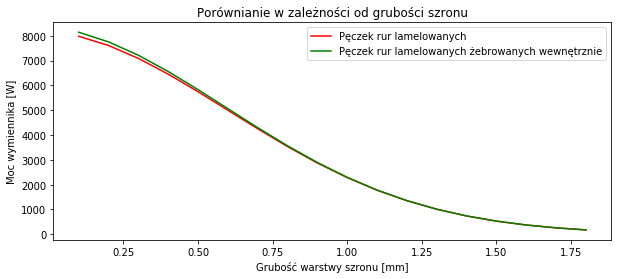

In [28]:
#wydatek czynnika
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10 # K
d_s = 0.001 # m 
lam_s = 0.5 # W/mK

A_r = math.pi*d_z*(t-dt-2*d_s)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p1 = []
p2 = []
p3 = []
p4 = []

for d_s in range(1,19,1):
    d_s = d_s/10000
    w_cz = w_cz*t/(t+2*d_s)
#     x3 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s)*T
#     x4 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s)*T
    x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam)*T
    x4 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam)*T
    step.append(d_s)
#     p1.append(x1)
#     p2.append(x2)
    p3.append(x3)
    p4.append(x4)
step = [xx*1000 for xx in step]
import matplotlib.pyplot as plt
labels = ["Pęczek rur lamelowanych","Pęczek rur lamelowanych żebrowanych wewnętrznie"]
plt.figure(figsize=(10,4))
plt.title("Porównianie w zależności od grubości szronu")
# plt.plot(step,p1)
# plt.plot(step,p2)
plt.plot(step,p3,color="red")
plt.plot(step,p4,color="green")
plt.ylabel("Moc wymiennika [W]")
plt.xlabel("Grubość warstwy szronu [mm]")
plt.legend(labels=labels)
# print(p4[19]/p4[0])
# print(p4[len(p4)-1]/p3[len(p3)-1])

1.0001332334068838


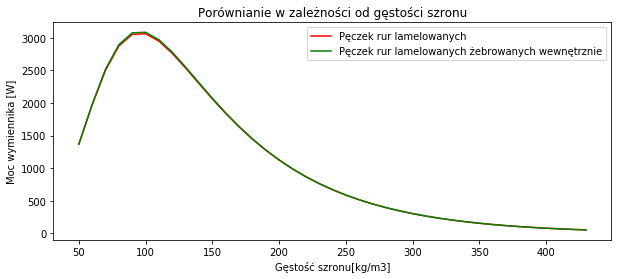

In [29]:
#wydatek czynnika
mass_flow = 432 # kg/(m2s)
d_w = 0.014 # m
d_z = 0.016 # m
n_r = 8
n_rr = 4
t=0.004 # m
dt=0.0003 # m
L=1 # m
S_q=0.05 # m
S_l=0.05 # m
e = 0.003 # m
p = 0.005 # m
a = 30 # degrees
dp = 35000 # Pa
dT = 3 # K
w_cz = 2 # m/s
lam = 401 # W/(mK)
T = 10 # K
d_s = 0.001 # m 
lam_s = 0.5 # W/mK

A_r = math.pi*d_z*(t-dt-2*d_s)*L/t*n_r*n_rr
A_z = 2*(S_q*S_l-math.pi*d_z**2/4)*L/t*n_r*n_rr
A_gl = math.pi*d_z*L*n_r*n_rr
A_w = math.pi*d_w*L*n_r*n_rr
step = []
p1 = []
p2 = []
p3 = []
p4 = []

for ro_s in range(50,431,10):
    lam_s = 0.00032*ro_s*(1+0.0038*ro_s**2)
    w_cz = w_cz*t/(t+d_s)
#     x3 = bez_zeber(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s)*T
#     x4 = zebra_in(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s)*T
    x3 = zebra_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s)*T
    x4 = zebra_in_out(mass_flow, d_w, e, p, a, S_q, S_l, d_z, w_cz, n_r, n_rr, t, dt, L, lam, dp, dT,d_s,lam_s)*T
    step.append(ro_s)
#     p1.append(x1)
#     p2.append(x2)
    p3.append(x3)
    p4.append(x4)
# step = [xx*1000 for xx in step]
import matplotlib.pyplot as plt
labels = ["Pęczek rur lamelowanych","Pęczek rur lamelowanych żebrowanych wewnętrznie"]
plt.figure(figsize=(10,4))
plt.title("Porównianie w zależności od gęstości szronu")
# plt.plot(step,p1)
# plt.plot(step,p2)
plt.plot(step,p3,color="red")
plt.plot(step,p4,color="green")
plt.ylabel("Moc wymiennika [W]")
plt.xlabel("Gęstość szronu[kg/m3]")
plt.legend(labels=labels)
print(p4[len(p4)-1]/p3[len(p3)-1])

[1, 2, 3, 4, 5, 6, 7, 8, 9] [112.53768160454052, 195.17282698338903, 255.93186557163529, 302.07899918710984, 338.1666526119737, 367.087967848678, 390.745078668981, 410.4316990066903, 427.05498427236]


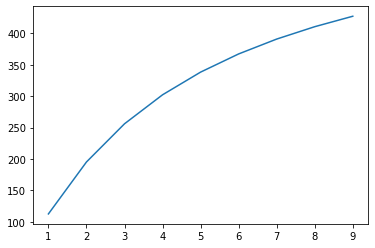

In [30]:
step = []
ro = []
for v in range(1,10,1):
    step.append(v)
    ro.append(616/(1+0.981*10**0.659/v**1.053))
print(step,ro)
plt.plot(step,ro)